In [1]:
import pandas as pd

import numpy as np

from scipy.stats import linregress

from sklearn import datasets

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

In [2]:
# Input File paths

file = '../Data/combined_df_US.xlsx'

US_df = pd.read_excel(file)

US_df.tail()

,date,cases,deaths,Per_decrease_ret_rec,Per_decrease_parks,Per_decrease_grocery,Per_decrease_transit,Per_decrease_workplace,Per_decrease_residential
45,2020-04-01,214711,4841,-38,-7,-11,-48,-49,20
46,2020-04-02,244423,6232,-40,-9,-11,-51,-50,21
47,2020-04-03,276501,7121,-42,-21,-12,-51,-49,22
48,2020-04-04,311536,8499,-48,-24,-15,-50,-37,15
49,2020-04-05,336774,9655,-49,-20,-20,-54,-40,13


In [18]:
corr_df = US_df.corr(method ='pearson')

corr_df = corr_df[['cases', 'deaths']]

corr_df = corr_df.iloc[[2,3,4,5,6,7],:]

corr_df

,cases,deaths
Per_decrease_ret_rec,-0.743104,-0.655958
Per_decrease_parks,-0.722966,-0.652482
Per_decrease_grocery,-0.714332,-0.626920
Per_decrease_transit,-0.750559,-0.661978
Per_decrease_workplace,-0.724931,-0.631334
Per_decrease_residential,0.702406,0.606251


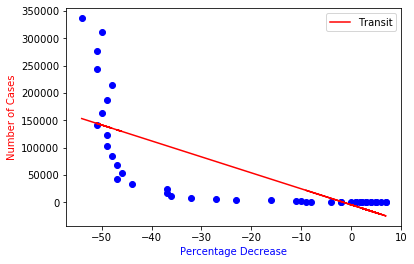

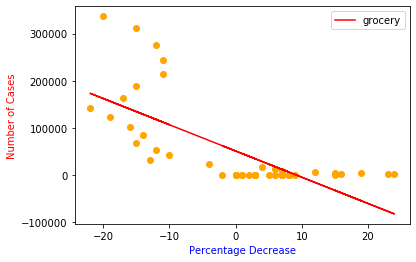

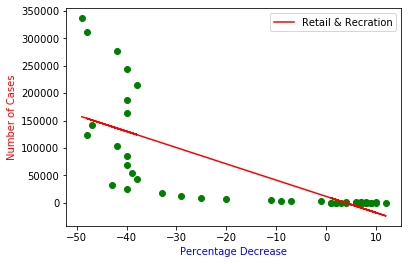

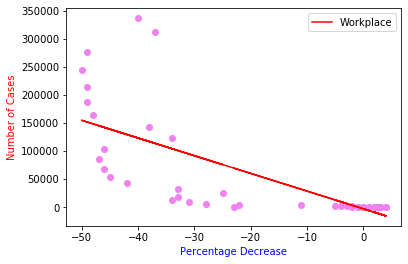

In [65]:
def scatter_plot(x,y,l,c):

    x_values = US_df[x]
    
    y_values = US_df[y]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values, color = c)
    
    plt.plot(x_values,regress_values,"r-")
    
    #plt.annotate(line_eq,(0,150000),fontsize=12,color="black")
    
    plt.legend([l])
    
    plt.xlabel('Percentage Decrease', color = 'blue') 

    plt.ylabel('Number of Cases', color = 'red')
    
    axes = plt.gca()
    
    #axes.set_xlim([-80,80])
    
    plt.show()
    

scatter_plot('Per_decrease_transit', 'cases', 'Transit', 'blue')

scatter_plot('Per_decrease_grocery', 'cases', 'grocery', 'orange')

scatter_plot('Per_decrease_ret_rec', 'cases', 'Retail & Recration', 'green')

scatter_plot('Per_decrease_workplace', 'cases', 'Workplace', 'violet')